# Exercises - Continuous Probablistic Methods

1. 1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#create a function to calculate outliers
def get_lower_and_upper_bounds(df, variable):
    '''
    This function calcualtes the lower and upper bound 
    to locate outliers in the variable named
    '''
    quartile1, quartile3 = np.percentile(df[variable], [25,75])
    IQR_value = quartile3 - quartile1
    lower_bound = quartile1 - (1.5 * IQR_value)
    upper_bound = quartile3 + (1.5 * IQR_value)
    '''
    returns the lowerbound and upperbound values
    '''
    return print(f'For {variable} the lower bound is {lower_bound} and  upper bound is {upper_bound}')

1. Using lemonade.csv dataset and focusing on continuous variables:

In [4]:
url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'

In [8]:
lemonade_df = pd.read_csv(url)
lemonade_df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

- Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [13]:
temp_outliers = get_lower_and_upper_bounds(lemonade_df, 'Temperature')

For Temperature the lower bound is 16.700000000000003 and  upper bound is 104.7


In [14]:
rain_outliers = get_lower_and_upper_bounds(lemonade_df, 'Rainfall')

For Rainfall the lower bound is 0.26 and  upper bound is 1.3


In [15]:
flyers_outliers = get_lower_and_upper_bounds(lemonade_df, 'Flyers')

For Flyers the lower bound is 4.0 and  upper bound is 76.0


In [12]:
price_outliers = get_lower_and_upper_bounds(lemonade_df, 'Price')

For Price the lower bound is 0.5 and  upper bound is 0.5


In [16]:
sales_outliers = get_lower_and_upper_bounds(lemonade_df, 'Sales')

For Sales the lower bound is 5.0 and  upper bound is 45.0


In [17]:
lemonade_df.shape

(365, 7)

In [18]:
lemonade_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [25]:
lemonade_df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [21]:
# converts the sale_date column from an object to a datetime format
lemonade_df['Date'] = pd.to_datetime(lemonade_df['Date'], infer_datetime_format=True)

In [22]:
 lemonade_df = lemonade_df.set_index('Date')

In [23]:
lemonade_df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-01-02,Monday,28.9,1.33,15,0.5,13
2017-01-03,Tuesday,34.5,1.33,27,0.5,15
2017-01-04,Wednesday,44.1,1.05,28,0.5,17
2017-01-05,Thursday,42.4,1.00,33,0.5,18


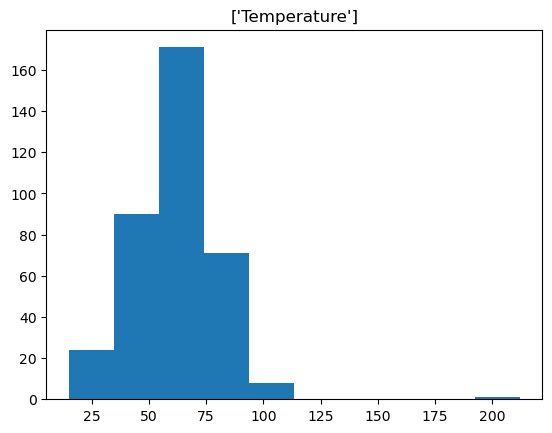

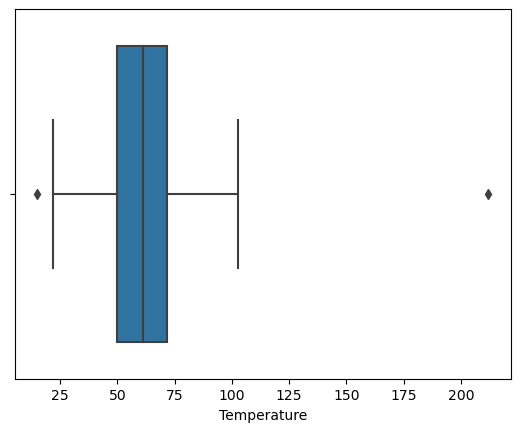

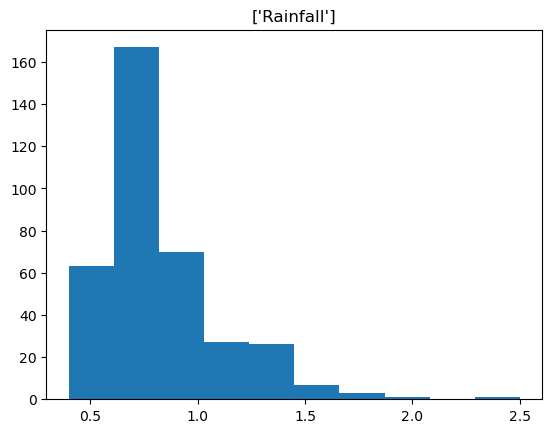

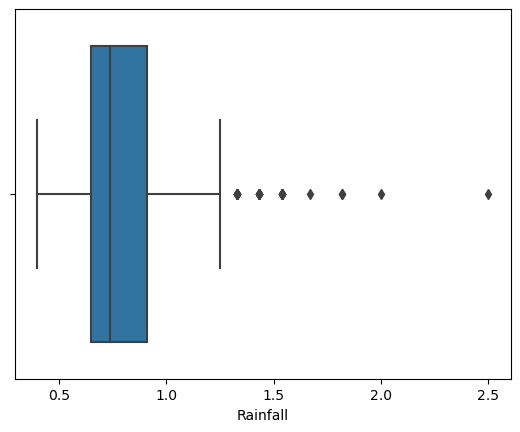

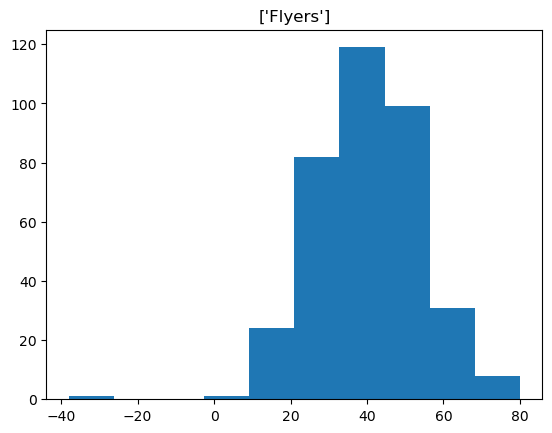

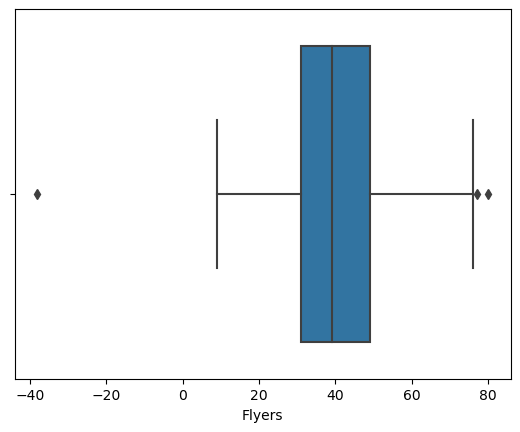

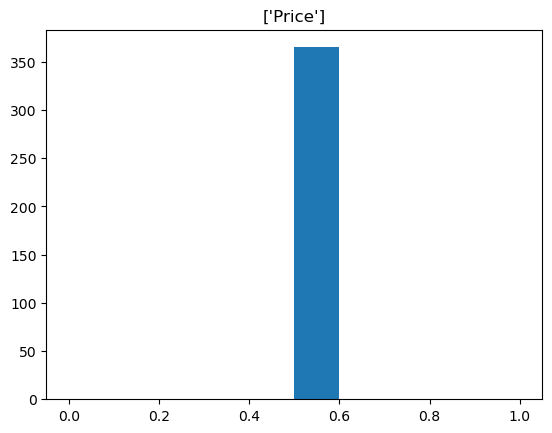

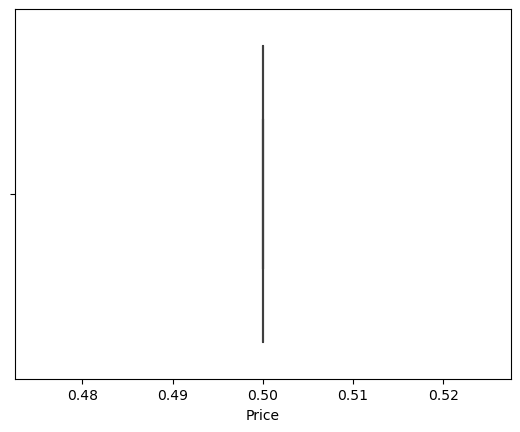

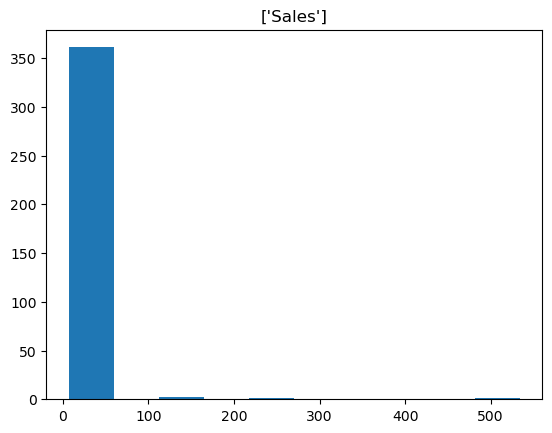

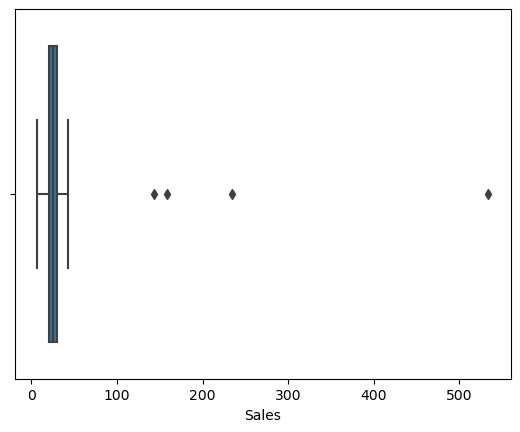

In [24]:
cols = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']

for col in cols:
    plt.hist(lemonade_df[col])
    plt.title([col])
    plt.show()
    sns.boxplot(data=lemonade_df, x= col)
    plt.show()

Do these outliers make sense? Which outliers would you keep?

- The temp. outlier seems a bit odd when compared to the upper outlier, but without knowing what region of the country this information comes from it's hard to make an accurate determination. I would get rid of the extreme outlier at the 200 degree range, because I beleive this is throwing off the data. I would keep the lower outlier at around 16 degrees, because it appears that this outlier is not far off from the rest of the data range.

- Rainfall makes sense, the upper and lower outliers are relatively close to eachother. However, this is one outlier near 2.5 that appears to be out of the range of the rest of the data and I would eliminate this outlier. The lower outlier is well within the range of the rest of the data and I would keep the lower outliers.

- The lower outliers do not make sense, how can you send out negative flyers? This may be a typo and I would either drop this data, since it is so few that it should not effect the dataset, or would change the negatives into a positive number. I would keep the upper outliers, as this data appears just outside the normal range of the dataset.

- There is only one price for the cost of the flyers and would keep this data, because there are no outliers.

- There are not any outliers for sales and would not eliminate the lower bounds. However, for the upper bound outliers the sales of over 500 dollars seems suspicious and I would investigate this observation. If this data point is accurate and not a typo, I would investigate the drivers of this sales amount to try and replicate this outcome. Yet, if I was looking at trends and trying to predict sales for the month or year, I would eliminate this outlier to as not to skew the data.

- Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [26]:
#create a function to calculate outliers
def get_lower_and_upper_bounds(df, variable):
    '''
    This function calcualtes the lower and upper bound 
    to locate outliers in the variable named
    '''
    quartile1, quartile3 = np.percentile(df[variable], [25,75])
    IQR_value = quartile3 - quartile1
    lower_bound = quartile1 - (3 * IQR_value)
    upper_bound = quartile3 + (3 * IQR_value)
    '''
    returns the lowerbound and upperbound values
    '''
    return print(f'For {variable} the lower bound is {lower_bound} and  upper bound is {upper_bound}')

In [27]:
temp_outliers2 = get_lower_and_upper_bounds(lemonade_df, 'Temperature')

For Temperature the lower bound is -16.299999999999997 and  upper bound is 137.7


In [28]:
rain_outliers2 = get_lower_and_upper_bounds(lemonade_df, 'Rainfall')

For Rainfall the lower bound is -0.13 and  upper bound is 1.69


In [29]:
flyers_outliers2 = get_lower_and_upper_bounds(lemonade_df, 'Flyers')

For Flyers the lower bound is -23.0 and  upper bound is 103.0


In [31]:
price_outliers2 = get_lower_and_upper_bounds(lemonade_df, 'Price')

For Price the lower bound is 0.5 and  upper bound is 0.5


In [32]:
sales_outliers = get_lower_and_upper_bounds(lemonade_df, 'Sales')

For Sales the lower bound is -10.0 and  upper bound is 60.0


Do these outliers make sense? Which outliers would you keep?

- The temp. lower bound outlier is off, because the min temp. is 15 degrees and there are not any negative temperatures. The upper bound makes sense, because the highest temp. is 212 degrees. Just like the above conclusion, I would eliminate the extreme outlier at 200 degrees.

- Rainfall lower bound does not make sense because this is also negative, just like the temp. The upper bound makes sense because this falls below the max amount for rainfall. I might get rid of the largest numerical outlier at the 2.5 range.

- Neither the upper or lower bound outliers makes sense. You cannot hand out negative flyers and the upper bound is above the max number of flyers handed out. Setting the multiplier at three, at least for this column, would be pointless.

- There is only one price for the cost of the flyers and would keep this data, because there are no outliers.

- The lower bound for this outlier does not make sense, you cannot have a negative number for sales. The upper bounds makes sense, but if you set the upper bound at 60, then you eliminate a decent amount of your data and risk not having data on higher sales and determining what is driving your higer sales volumes.

2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

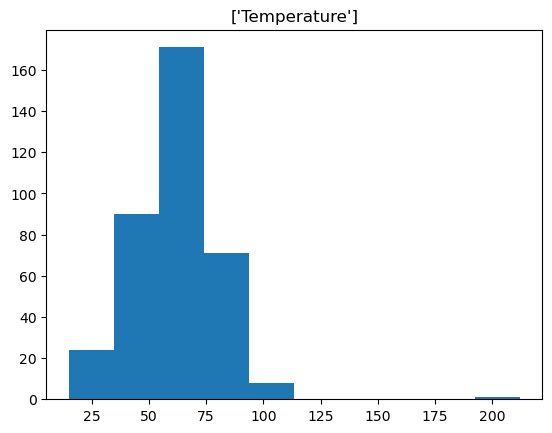

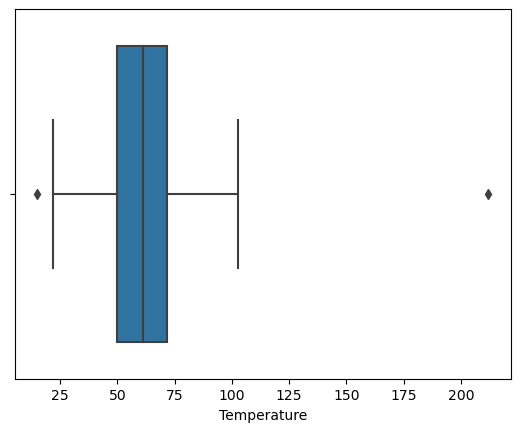

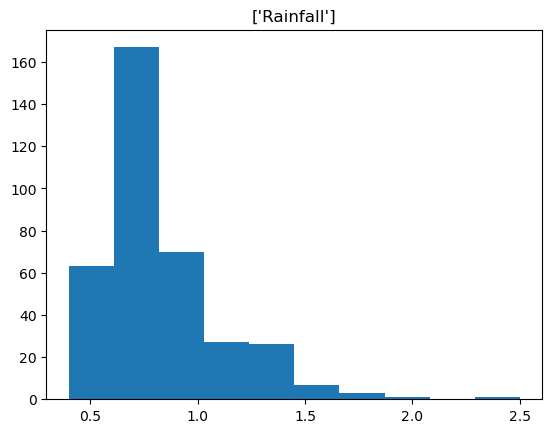

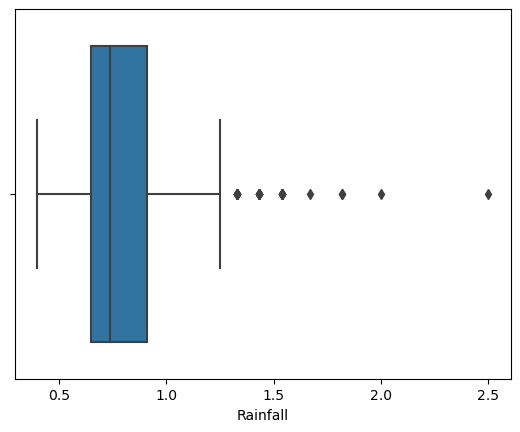

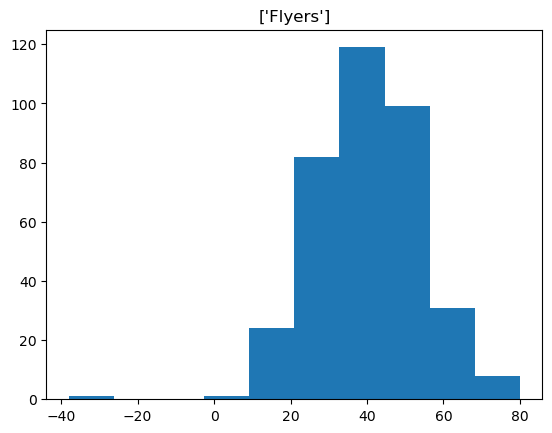

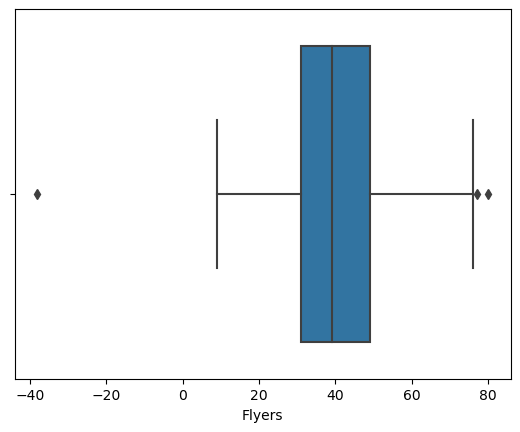

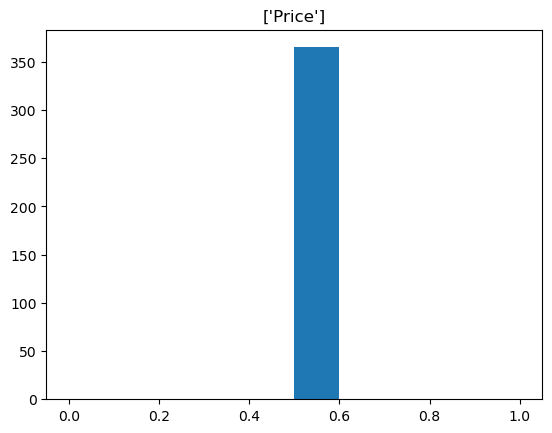

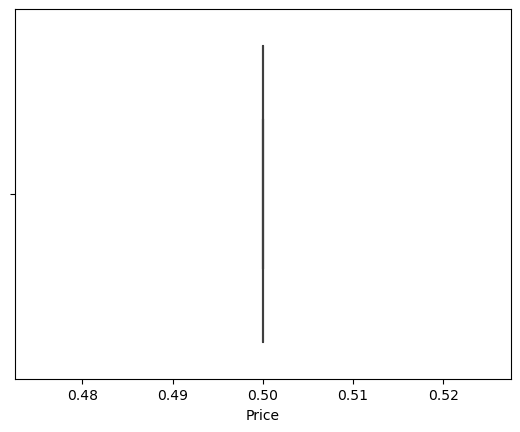

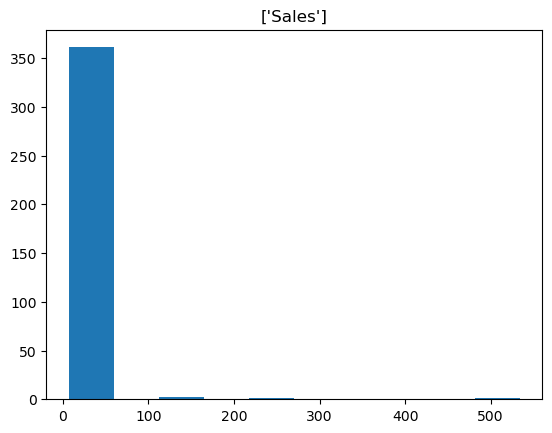

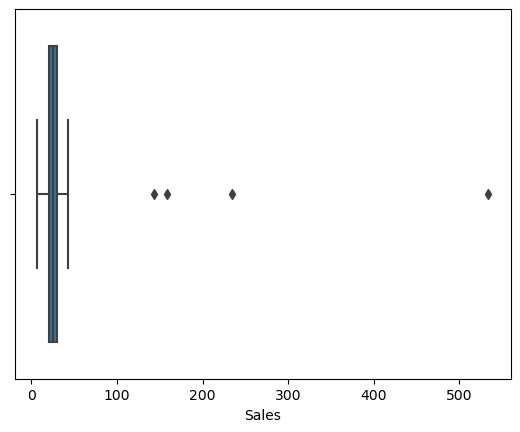

In [33]:
cols = ['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']

for col in cols:
    plt.hist(lemonade_df[col])
    plt.title([col])
    plt.show()
    sns.boxplot(data=lemonade_df, x= col)
    plt.show()

- It appears that flyers are the only column that is somewhat normally distributed, as the temp. and rainfall have large spikes and price and sales are uniformly distributed.

- Use a 2 sigma decision rule to isolate the outliers.

In [35]:
#assign a new column to the zscores for flyers
lemonade_df['flyers_zscores'] = (lemonade_df['Flyers'] - lemonade_df['Flyers'].mean()) / lemonade_df['Flyers'].std()

In [39]:
lemonade_df['temp_zscores'] = (lemonade_df['Temperature'] - lemonade_df['Temperature'].mean()) / lemonade_df['Temperature'].std()

In [43]:
lemonade_df['rain_zscores'] = (lemonade_df['Rainfall'] - lemonade_df['Rainfall'].mean()) / lemonade_df['Rainfall'].std()

In [52]:
lemonade_df[lemonade_df['flyers_zscores'].abs() >= 1].sort_values('flyers_zscores', ascending=False)

,Day,Temperature,Rainfall,Flyers,Price,Sales,flyers_zscores,temp_zscores,rain_zscores
Date,,,,,,,,,
2017-07-14,Friday,92.0,0.50,80,0.5,40,2.893849,1.701621,-1.190158
2017-06-16,Friday,99.3,0.47,77,0.5,41,2.676244,2.105251,-1.299691
2017-07-18,Tuesday,99.3,0.47,76,0.5,41,2.603709,2.105251,-1.299691
2017-06-21,Wednesday,94.3,0.47,76,0.5,41,2.603709,1.828792,-1.299691
2017-07-27,Thursday,97.9,0.47,74,0.5,43,2.458639,2.027843,-1.299691
...,...,...,...,...,...,...,...,...,...
2017-01-02,Monday,28.9,1.33,15,0.5,13,-1.820927,-1.787286,1.840253
2017-01-28,Saturday,34.9,1.33,15,0.5,13,-1.820927,-1.455535,1.840253
2017-12-05,Tuesday,22.0,1.82,11,0.5,10,-2.111067,-2.168799,3.629291


In [51]:
lemonade_df[lemonade_df['temp_zscores'].abs() >= 1].sort_values('temp_zscores', ascending=False)

,Day,Temperature,Rainfall,Flyers,Price,Sales,flyers_zscores,temp_zscores,rain_zscores
Date,,,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,-0.370227,8.336627,0.306792
2017-07-01,Saturday,102.9,0.47,59,0.5,143,1.370614,2.304301,-1.299691
2017-06-26,Monday,102.6,0.47,60,0.5,42,1.443149,2.287714,-1.299691
2017-07-22,Saturday,99.6,0.47,49,0.5,42,0.645264,2.121838,-1.299691
2017-07-18,Tuesday,99.3,0.47,76,0.5,41,2.603709,2.105251,-1.299691
...,...,...,...,...,...,...,...,...,...
2017-01-24,Tuesday,28.6,1.54,20,0.5,12,-1.458252,-1.803873,2.606983
2017-01-01,Sunday,27.0,2.00,15,0.5,10,-1.820927,-1.892340,4.286488
2017-01-06,Friday,25.3,1.54,23,0.5,11,-1.240647,-1.986336,2.606983


In [44]:
lemonade_df[lemonade_df['rain_zscores'].abs() >= 1]

,Day,Temperature,Rainfall,Flyers,Price,Sales,flyers_zscores,temp_zscores,rain_zscores
Date,,,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,-1.820927,-1.892340,4.286488
2017-01-02,Monday,28.9,1.33,15,0.5,13,-1.820927,-1.787286,1.840253
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,-0.950507,-1.477652,1.840253
2017-01-06,Friday,25.3,1.54,23,0.5,11,-1.240647,-1.986336,2.606983
2017-01-07,Saturday,32.9,1.54,19,0.5,13,-1.530787,-1.566119,2.606983
...,...,...,...,...,...,...,...,...,...
2017-12-26,Tuesday,28.9,1.43,23,0.5,13,-1.240647,-1.787286,2.205363
2017-12-28,Thursday,37.8,1.25,32,0.5,16,-0.587832,-1.295189,1.548165
2017-12-29,Friday,39.5,1.25,17,0.5,15,-1.675857,-1.201194,1.548165


In [37]:
lemonade_df[lemonade_df['flyers_zscores'].abs() >= 2]

,Day,Temperature,Rainfall,Flyers,Price,Sales,flyers_zscores
Date,,,,,,,
2017-06-16,Friday,99.3,0.47,77,0.5,41,2.676244
2017-06-20,Tuesday,85.1,0.54,70,0.5,37,2.168499
2017-06-21,Wednesday,94.3,0.47,76,0.5,41,2.603709
2017-07-02,Sunday,93.4,0.51,68,0.5,158,2.023429
2017-07-03,Monday,81.5,0.54,68,0.5,235,2.023429
2017-07-14,Friday,92.0,0.50,80,0.5,40,2.893849
2017-07-18,Tuesday,99.3,0.47,76,0.5,41,2.603709
2017-07-23,Sunday,89.1,0.51,72,0.5,37,2.313569
2017-07-24,Monday,83.5,0.57,69,0.5,35,2.095964


In [41]:
lemonade_df[lemonade_df['temp_zscores'].abs() >= 2]

,Day,Temperature,Rainfall,Flyers,Price,Sales,flyers_zscores,temp_zscores
Date,,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,-0.370227,8.336627
2017-06-16,Friday,99.3,0.47,77,0.5,41,2.676244,2.105251
2017-06-26,Monday,102.6,0.47,60,0.5,42,1.443149,2.287714
2017-07-01,Saturday,102.9,0.47,59,0.5,143,1.370614,2.304301
2017-07-10,Monday,98.0,0.49,66,0.5,40,1.878359,2.033372
2017-07-18,Tuesday,99.3,0.47,76,0.5,41,2.603709,2.105251
2017-07-22,Saturday,99.6,0.47,49,0.5,42,0.645264,2.121838
2017-07-27,Thursday,97.9,0.47,74,0.5,43,2.458639,2.027843
2017-12-05,Tuesday,22.0,1.82,11,0.5,10,-2.111067,-2.168799


In [49]:
lemonade_df[lemonade_df['rain_zscores'].abs() >= 2].sort_values('rain_zscores', ascending=False)

,Day,Temperature,Rainfall,Flyers,Price,Sales,flyers_zscores,temp_zscores,rain_zscores
Date,,,,,,,,,
2017-12-31,Sunday,15.1,2.50,9,0.5,7,-2.256137,-2.550311,6.112037
2017-01-01,Sunday,27.0,2.00,15,0.5,10,-1.820927,-1.892340,4.286488
2017-12-05,Tuesday,22.0,1.82,11,0.5,10,-2.111067,-2.168799,3.629291
2017-12-10,Sunday,31.3,1.82,15,0.5,11,-1.820927,-1.654586,3.629291
2017-01-16,Monday,30.6,1.67,24,0.5,12,-1.168112,-1.693290,3.081626
2017-01-06,Friday,25.3,1.54,23,0.5,11,-1.240647,-1.986336,2.606983
2017-12-22,Friday,30.9,1.54,17,0.5,13,-1.675857,-1.676702,2.606983
2017-12-14,Thursday,31.9,1.54,24,0.5,13,-1.168112,-1.621411,2.606983
2017-01-11,Wednesday,32.6,1.54,23,0.5,12,-1.240647,-1.582706,2.606983


    - Do these make sense?

- At std of 1 there are too many outliers to eliminate as this would eliminate over half of the observations. However, at std of 2, I can see that there are -38 flyers for this day and might want to either eliminate this observation or change this number to a positive number.
- The std dev of 8 and temp of 212 does not make sense.

    - Should certain outliers be kept or removed?

- The outlier for the negative flyers should either be removed or fixed.

3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [38]:
lemonade_df[lemonade_df['flyers_zscores'].abs() >= 3]

,Day,Temperature,Rainfall,Flyers,Price,Sales,flyers_zscores
Date,,,,,,,
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,-5.665283


In [42]:
lemonade_df[lemonade_df['temp_zscores'].abs() >= 3]

,Day,Temperature,Rainfall,Flyers,Price,Sales,flyers_zscores,temp_zscores
Date,,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,-0.370227,8.336627


In [53]:
lemonade_df[lemonade_df['rain_zscores'].abs() >= 3]

,Day,Temperature,Rainfall,Flyers,Price,Sales,flyers_zscores,temp_zscores,rain_zscores
Date,,,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,-1.820927,-1.892340,4.286488
2017-01-16,Monday,30.6,1.67,24,0.5,12,-1.168112,-1.693290,3.081626
2017-12-05,Tuesday,22.0,1.82,11,0.5,10,-2.111067,-2.168799,3.629291
2017-12-10,Sunday,31.3,1.82,15,0.5,11,-1.820927,-1.654586,3.629291
2017-12-31,Sunday,15.1,2.50,9,0.5,7,-2.256137,-2.550311,6.112037


- The 3 sigma decision rule identifies the true outlier to be eliminated or fixed.